<a href="https://colab.research.google.com/github/gabyelan/A399A401/blob/main/sbA399A401.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Surface Brightness Profiles**

This notebook is going to be used for surface brightness profiles for the Abell 399/Abell 401 System. 

In [ ]:
#@markdown First need to import the proper libraries

import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#@markdown Define our Surface Brightness function, which will calculate
#@markdown the surface brightness and the Poisson error given input
#@markdown arrays Source Counts, Background Counts, Area (bin2 Chandra pixels),
#@markdown the total exposure in the region, and the exposure time of the
#@markdown background observation respectively.

def calcSB(T, B, Abin2pix, Etot):

  '''  
  this function takes in source counts (T), background counts (B), Area in suzaku bin2 pixels (Abin2pix), 
  total exposure (Etot), and background exposure (Ebg) and calculates the surface brightness as well as
  the surface brightness poisson error because one should really start to at least make strives towards 
  efficiency and I am beyond due.
  '''
  T = np.asanyarray(T)
  B = np.asanyarray(B)
  Abin2pix = np.asanyarray(Abin2pix)
  Etot = np.asanyarray(Etot)

  Emean = Etot/Abin2pix
  Aarcsec = Abin2pix*(.984*2.)**2.
  SB = (T/(Emean*Aarcsec)) - (B/(Emean*Aarcsec))
  SBpix = (T/(Emean*Aarcsec)) - (B/(Emean*Abin2pix))
  params.append(SB)

  Terr = np.sqrt(T)
  Berr = np.sqrt(B)
  Terr = np.array(Terr)
  Berr = np.array(Berr)
  SBerr = np.sqrt((Terr/(Emean*Aarcsec))**2 + (Berr/(Emean*Aarcsec))**2)
  paramsErr.append(SBerr)


  return

This bin2 (0.984''), log, and smoothed with a gaussian kernel of 3 sigma image has been GGM filtered with a sigma of 5 pixels. The region is placed where there could be either a chip edge or a real one. Looking for a merger shock! But if the edge is indeed physical, it could also be a cold front or part of a sloshing spiral

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


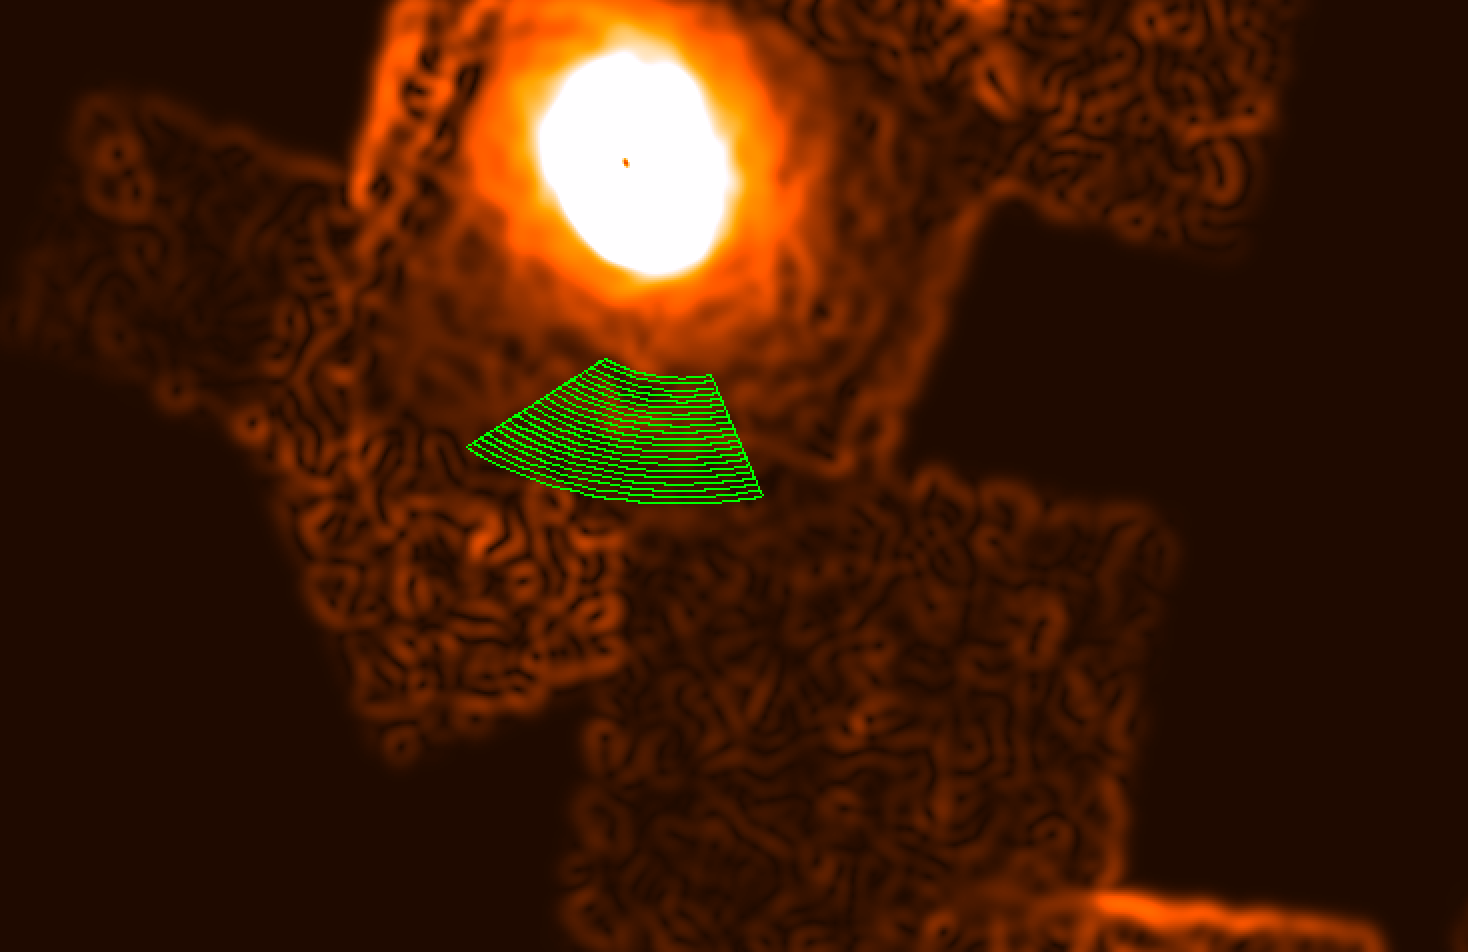

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

from IPython.display import Image
Image('/content/drive/MyDrive/Colab_Notebooks/A399_A401/ggmA401SSE.1.reg.png')

In [ ]:
def sbPlot(pos, SB, SBerr):
  plt.errorbar(pos,SB,yerr=SBerr,fmt='b.')
  plt.xlabel('dist [$arcsec$]')
  plt.ylabel('SB [cts s$^{-1}$ arcsec$^{-2}$]')
#    plt.legend(loc=3)
  plt.yscale('log')
#    plt.ylim(0.5e-7,5.5e-7)
  plt.show()

  return

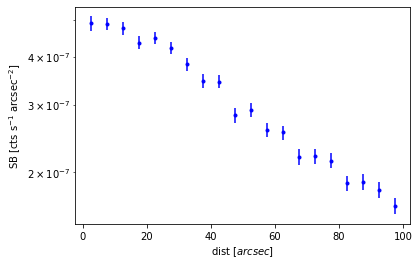

In [ ]:
#@markdown SB plot for the region shown in the above image

params = []
paramsErr = []
T = np.array([736., 1080., 900., 890., 994., 1042., 873., 964., 960., 860., 948., 912.,
     940., 848., 919., 943., 863., 911., 904., 838.])
B = np.array([70., 108., 92., 92., 104., 114., 105., 125., 121., 129., 138., 146., 153.,
     159., 173., 180., 178., 190., 202., 192.])
Abin2pix = np.array([2541., 3734., 3195., 3444., 3475., 4167., 3900., 4923., 5070., 5421.,
            5701., 5973., 6158., 6230., 6722., 7070., 7286., 7633., 7837., 8141.])
Etot = np.array([351668439., 515249619., 438546866., 472589585., 512894913., 568822155.,
        518656058., 625353286., 628055990., 669814457., 718110494., 766437940., 
        799279017., 809263672., 873304594., 917633961., 944071059., 985515566., 
        1007790291., 1017796156.])

calcSB(T, B, Abin2pix, Etot)

sb = np.array(params)
sbErr = np.array(paramsErr)

sb = sb.flatten()
sbErr = sbErr.flatten()

pos = np.array([2.5, 7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5, 
                57.5, 62.5, 67.5, 72.5, 77.5, 82.5, 87.5, 92.5, 97.5])

sbPlot(pos, sb, sbErr)

Looks like there's a jump in surface brightness. To ascertain the nature of the jump, need to fit a broken powerlaw to the SB profile, assuming this represents the jump in the underlying density.

$n_d(r) = Cn_0 (\frac{r}{r_j})^{a_1}$ if $r \leq r_j$ \\

$n_u(r) = n_0 (\frac{r}{r_j})^{a_2}$ if $r > r_j$

Where 'd' represents downstream, 'u' represents upstream, $C = n_d/n_u$, $r_j$ is the radius of the jump, $a_1$ and $a_2$ are powerlaw indices, and $n_0$ is a normalization factor

In [ ]:
from scipy.optimize import curve_fit

def fitFunc(r, c, norm, pow1, pow2):
  for i in range(0,len(r)):
    if r[i] <= rjump:
      y = c*norm*np.power((r/rjump),pow1)
    else:
      y = norm*np.power((r/rjump),pow2)
  return y

In [ ]:
rjump = 47.5 #arcseconds

popt,pcov = curve_fit(fitFunc,pos,sb, p0=[1.2,1e-7,-0.1, -0.2])

print(popt)

[ 1.20000000e+00  2.89680377e-07 -1.00000000e-01 -2.48388242e-01]


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [ ]:
def sbPlotFitJump(pos, SB, SBerr, func, posFit, popt):
  plt.errorbar(pos,SB,yerr=SBerr,fmt='b.', label='Data')
  plt.plot(posFit,func(posFit, *popt), 'k-', label='Fit')
  plt.xlabel('dist [$arcsec$]')
  plt.ylabel('SB [cts s$^{-1}$ arcsec$^{-2}$]')
  plt.legend(loc=4)
  plt.yscale('log')
  plt.xscale('log')
  plt.show()

  return

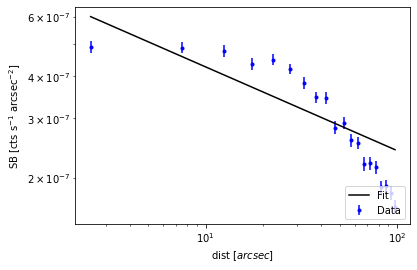

In [ ]:
r = np.linspace(pos[0],pos[-1],1000)
sbPlotFitJump(pos, sb, sbErr, fitFunc, r, popt)

Gonna try log-transforming so that curve_fit has a better chance of finding a statistically significant global solution

log$(n_d)$ = log($Cn_0(\frac{r}{r_j})^{a_1}$) \\
=> $\log(n_d) = \log(Cn_0) + a_1\log(\frac{r}{r_j})$ \\
=> $\log(n_d) = \log(Cn_0) + a_1(\log(r) - \log(r_j))$ \\

$\log(n_u) = \log(n_0(\frac{r}{r_j})^{a_2})$ \\
=> $\log(n_u) = \log(n_0) + a_2\log(\frac{r}{r_j})$ \\
=> $\log(n_u) = \log(n_0) + a_2(\log(r) - \log(r_j))$

Now we'll define log$(n) == q$ and log$(r) == v$ \\

so we have

$q = \log(C) + \log(n_0) + a_1(v - \log(r_j))$ if $r \leq r_j$ \\
$q = \log(n_0) + a_2(v - \log(r_j))$ if $r > r_j$

In [ ]:
def sbPlotFitJumpLogSpace(pos, SB, SBerr, func, posFit, popt):
  plt.errorbar(pos,SB,yerr=SBerr,fmt='b.', label='Data')
  plt.plot(posFit,np.exp(func(posFit, *popt)), 'k-', label='Fit')
  plt.xlabel('dist [$arcsec$]')
  plt.ylabel('SB [cts s$^{-1}$ arcsec$^{-2}$]')
  plt.legend(loc=3)
  plt.yscale('log')
  plt.xscale('log')
  plt.show()

  return

In [ ]:
#try without if statements and in logspace?

def fitFuncLogSpace(v, c, norm, pow1, pow2):
  
  v = np.log(v)
  q = np.empty_like(v)

  q[v.any() <= np.log(rjump)] = np.log(c) + np.log(norm) + pow1*(v - np.log(rjump)) 
  q[v.any() > np.log(rjump)] = np.log(norm) + pow2*(v - np.log(rjump))

  return q


Okay, so the any() function is just returning 'true' for whichever line comes first because it is true for any of the values. All returns the same thing. e.g. "q[v.any() <= np.log(rjump)] = np.log(c) + np.log(norm) + pow1*(v - np.log(rjump))" is the only part of the piecewise function being used for the fit. Need to figure out a different way. Looping already doesn't work (tried it).

In [ ]:
rjump = 47.5 #arcseconds
rlog = np.logspace(0.4,2.0,num=1000)

popt,pcov = curve_fit(fitFuncLogSpace,pos,np.log(sb), p0=[1,1e-8,-1, -0.3])

print(popt)

print(np.exp(fitFuncLogSpace(rlog,*popt)[:10]))

[ 2.95792952e+00  9.19442660e-08 -3.40942744e-01 -3.00000000e-01]
[7.40955103e-07 7.40024059e-07 7.39094184e-07 7.38165477e-07
 7.37237938e-07 7.36311564e-07 7.35386354e-07 7.34462307e-07
 7.33539421e-07 7.32617694e-07]


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


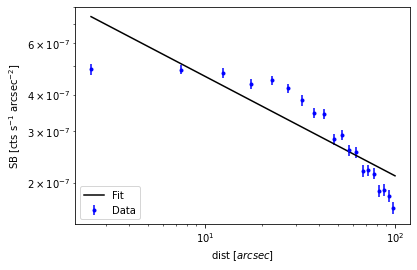

In [ ]:
sbPlotFitJumpLogSpace(pos, sb, sbErr, fitFuncLogSpace, rlog, popt)

This is a pretty bad fit statistically; curve_fit is getting stuck in a local minimum. Try a new, circular region.

In [ ]:
#@markdown SB plot for region a401SE.circ.1.reg
#@markdown It's time to start using pandas instead of manually inputting everything...


import pandas as pd

filenameEXP = '/content/drive/MyDrive/Colab_Notebooks/A399_A401/a401SE.circ.1.reg.exp.txt'
filenameBG = '/content/drive/MyDrive/Colab_Notebooks/A399_A401/a401SE.circ.1.reg.bg.txt'
filenameSRC = '/content/drive/MyDrive/Colab_Notebooks/A399_A401/a401SE.circ.1.reg.src.txt'

expReg = pd.read_csv(filenameEXP, delimiter= '\s+', index_col=False)
bgReg = pd.read_csv(filenameBG, delimiter= '\s+', index_col=False)
srcReg = pd.read_csv(filenameSRC, delimiter= '\s+', index_col=False)

srcReg.head(5)

,reg,net_counts,error,background,berror,area,surf_bri,surf_err,radius1,radius2,angle1,angle2
0,1,1273.0,35.679,0.0,0.0,1297.0,0.981,0.028,223.639,228.664,262.333,328.753
1,2,1385.0,37.216,0.0,0.0,1384.0,1.001,0.027,228.664,233.804,262.333,328.753
2,3,1303.0,36.097,0.0,0.0,1370.0,0.951,0.026,233.804,238.827,262.333,328.753
3,4,1290.0,35.917,0.0,0.0,1415.0,0.912,0.025,238.827,243.970,262.333,328.753
4,5,1205.0,34.713,0.0,0.0,1442.0,0.836,0.024,243.970,248.990,262.333,328.753


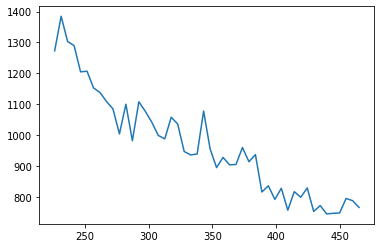

In [ ]:
#@markdown testing testing 1 2 3 

srcReg.radius2 = np.asanyarray(srcReg.radius2)
srcReg.radius1 = np.asanyarray(srcReg.radius1)

posFile = (srcReg.radius2 - srcReg.radius1)/2. + srcReg.radius1

plt.plot(posFile,srcReg.net_counts)
plt.show()

#@markdown !!!!it works!!!!

In [ ]:
def calcSBpandas(T, B, Abin2pix, Etot):

  '''  
  this function takes in source counts (T), background counts (B), Area in suzaku bin2 pixels (Abin2pix), 
  total exposure (Etot), and background exposure (Ebg) and calculates the surface brightness as well as
  the surface brightness poisson error. Simplified version of calcSB, because that function is kinda redundant
  and makes for more errors and work later on
  '''
  T = np.asanyarray(T)
  B = np.asanyarray(B)
  Abin2pix = np.asanyarray(Abin2pix)
  Etot = np.asanyarray(Etot)

  Emean = Etot/Abin2pix
  Aarcsec = Abin2pix*(.984*2.)**2.
  SB = (T/(Emean*Aarcsec)) - (B/(Emean*Aarcsec))

  Terr = np.sqrt(T)
  Berr = np.sqrt(B)
  Terr = np.array(Terr)
  Berr = np.array(Berr)
  SBerr = np.sqrt((Terr/(Emean*Aarcsec))**2 + (Berr/(Emean*Aarcsec))**2)

  return SB, SBerr

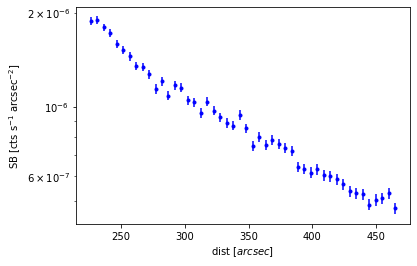

In [ ]:
#@markdown Giant SB profile to see where there are any breaks

sbFile, sbErrFile = calcSBpandas(srcReg.net_counts, bgReg.net_counts, srcReg.area, expReg.net_counts)

sbPlot(posFile,sbFile,sbErrFile)

In [ ]:
#@markdown looks like there might be something around 380''? \\
#@markdown Gonna make the region a bit more narrow \\
#@markdown exit out of funtools with each new query, otherwise \\
#@markdown the text file will save any previous query

filenameEXP = '/content/drive/MyDrive/Colab_Notebooks/A399_A401/a401SE.circ.2.reg.exp.txt'
filenameBG = '/content/drive/MyDrive/Colab_Notebooks/A399_A401/a401SE.circ.2.reg.bg.txt'
filenameSRC = '/content/drive/MyDrive/Colab_Notebooks/A399_A401/a401SE.circ.2.reg.src.txt'

expReg = pd.read_csv(filenameEXP, delimiter= '\s+', index_col=False)
bgReg = pd.read_csv(filenameBG, delimiter= '\s+', index_col=False)
srcReg = pd.read_csv(filenameSRC, delimiter= '\s+', index_col=False)

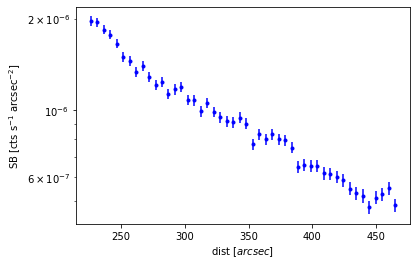

In [ ]:
sbFile2, sbErrFile2 = calcSBpandas(srcReg.net_counts, bgReg.net_counts, srcReg.area, expReg.net_counts)

sbPlot(posFile,sbFile2,sbErrFile2)

Try numpy.piecewise to define the function

In [ ]:
def fitFuncPieceWise(v, c, norm, rjump, pow1, pow2):
  '''
  this should return a piecewise function for the surface brightness as a proxy for density
  where v is distance in log space, c is the jump factor, norm is the normalization, pow1 is the
  power law for the upstream part of the piecewise function and pow2 is the power law for the
  downstream part of the piecewise function
  '''

  v = np.log(v)

  y = np.piecewise(v,[v <= np.log(rjump), v > np.log(rjump)],[lambda v : np.log(c) 
  + np.log(norm) + pow1*(v - np.log(rjump)), lambda v : np.log(norm) + pow2*(v - np.log(rjump))])

  return y

In [ ]:
sb, sbErr = calcSBpandas(T, B, Abin2pix, Etot)

print(sb)
quit()

popt,pcov = curve_fit(fitFuncPieceWise,pos,np.log(sb),p0=[2.,1e-7,70,-1.5,-2])

print(popt)

[4.88979495e-07 4.87077869e-07 4.75713155e-07 4.35981997e-07
 4.48034469e-07 4.21231931e-07 3.82324014e-07 3.46406742e-07
 3.44916055e-07 2.81781627e-07 2.91234994e-07 2.58048647e-07
 2.54229611e-07 2.19825965e-07 2.20558040e-07 2.14686567e-07
 1.87342236e-07 1.88895490e-07 1.79852614e-07 1.63878328e-07]
[ 8.20136367e-01  5.82206355e-07  1.50343757e+01 -1.49350915e-02
 -6.23612121e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


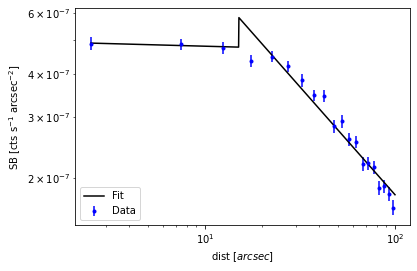

In [ ]:
sbPlotFitJumpLogSpace(pos, sb, sbErr, fitFuncPieceWise, rlog, popt)

In [ ]:
def fitFuncPieceWiseExp(r, c, norm, rjump, pow1, pow2):

  '''
  this should return a piecewise function for the surface brightness as a proxy for density
  where v is distance in log space, c is the jump factor, norm is the normalization, pow1 is the
  power law for the upstream part of the piecewise function and pow2 is the power law for the
  downstream part of the piecewise function
  '''

  y = np.piecewise(r, [r <= rjump, r > rjump], [lambda r : 
    c*norm*np.power((r/rjump),pow1), lambda r : norm*np.power((r/rjump),pow2)])

  return y

In [ ]:
popt,pcov = curve_fit(fitFuncPieceWiseExp,pos,sb,p0=[2.,1e-7,70,-1.5,-2])

print(popt)

[ 1.88870503e+00  1.63338896e-07  1.25000010e+01 -3.95238299e-01
  2.46804838e-01]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in power
  # This is added back by InteractiveShellApp.init_path()


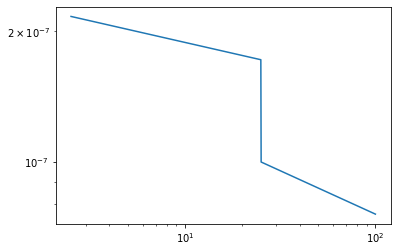

In [ ]:
plt.plot(rlog, fitFuncPieceWiseExp(rlog, 1.72, 1.e-7, 25, -0.1, -0.2))
plt.yscale('log')
plt.xscale('log')

The piecewise function works, the previous fit was just a poor one. On to a new region.